# **Final Project Task 4 - Census Modeling Clustering**

Requirements:

Load Data
- Use the preprocessed dataset from Task 1.

Prepare Features
- Feature Selection:
    - Select relevant numerical and categorical features.
    - Note: K-Means works best with numerical data.
- Data Preprocessing:
    - Be sure you have normalized numerical features (e.g., using MinMaxScaler or StandardScaler) and categorical features encoded properly (e.g., One-Hot Encoding or Ordinal Encoding).
    
Clustering Model Implementation
- Apply K-Means Clustering:
    - Experiment with different values of K (number of clusters).
    - Use the Elbow Method to determine the optimal number of clusters:
    - Use yellowbrick.cluster.KElbowVisualizer to find the best K.
    - Calculate the Silhouette Score to evaluate cluster separation.
- Alternative Clustering Approaches:
    - Experiment with Hierarchical Clustering.
    - Experiment with DBSCAN

Visualize & Interpret Clusters
- Dimensionality Reduction:
    - Apply PCA or t-SNE to reduce dimensions and visualize clusters in 2D.
- Cluster Analysis:
    - Plot the clusters in 2D space.
    - Identify key characteristics of each group.
    - Use only numerical variables to interpret the clusters.
- Example insights:
    - "Older individuals tend to work fewer hours per week."
    - "High-income individuals belong to a specific cluster."

Evaluate Cluster Quality
- Silhouette Score:
    - Compute the Silhouette Score to measure cluster compactness and separation. Higher values indicate better clustering results.
- Cluster Distribution:
    - Analyze how well the data points are distributed across clusters.


Deliverables:
- Notebook code with no errors.
- Visualizations & Analysis:
- Elbow method plot for K selection.
- 2D visualization of clusters.
- Summary of cluster characteristics.
- Cluster evaluation metrics (Silhouette Score).






In [ ]:
import pandas as pd

In [ ]:
# Example of using KElbowVisualizer

# from yellowbrick.cluster import KElbowVisualizer
# visualizer = KElbowVisualizer(clustering_model, k=(2, 10), metric='distortion', timings=False)
# visualizer.fit(preprocessed_data)
# visualizer.show()
# optimal_k = visualizer.elbow_value_


# Example of using PCA

# from sklearn.decomposition import PCA
# clusters = clustering_model.fit_predict(preprocessed_data)
# pca = PCA(n_components=2)
# pca_result = pca.fit_transform(preprocessed_data)
# pca1 = pca_result[:, 0]
# pca2 = pca_result[:, 1]
# # Visualizing Clusters
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x=pca1, y=pca2, hue=clusters, palette='tab10', data=data, alpha=0.7)
# plt.title(f'PCA Projection of Clusters (K={num_clusters})')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.legend(title='Cluster')
# plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [3]:
adult_data = pd.read_csv('adult_data')

In [16]:
adult_data = adult_data.drop(columns= ['income'])

In [14]:
adult_data.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = scaler.fit_transform(adult_data)

In [26]:
data_scaled = pd.DataFrame(data_scaled, columns=adult_data.columns )

In [27]:
data_scaled

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225


In [28]:
from sklearn.cluster import KMeans

In [32]:
km = KMeans(n_clusters=5)
%time km.fit(data_scaled)
clusters = km.labels_.tolist()
silhouette_k5 = silhouette_score(data_scaled[0:200], clusters[0:200])

CPU times: total: 172 ms
Wall time: 66.5 ms


In [38]:
km = KMeans(n_clusters=4)
%time km.fit(data_scaled)
clusters = km.labels_.tolist()
silhouette_k4 = silhouette_score(data_scaled[0:200], clusters[0:200])

CPU times: total: 125 ms
Wall time: 58.2 ms


In [37]:
km = KMeans(n_clusters=3)
%time km.fit(data_scaled)
clusters = km.labels_.tolist()
silhouette_k3 = silhouette_score(data_scaled[0:200], clusters[0:200])

CPU times: total: 62.5 ms
Wall time: 32.3 ms


In [36]:
km = KMeans(n_clusters=2)
%time km.fit(data_scaled)
clusters = km.labels_.tolist()
silhouette_k2 = silhouette_score(data_scaled[0:200], clusters[0:200])

CPU times: total: 125 ms
Wall time: 34.3 ms


In [39]:
silhouette = [silhouette_k2, silhouette_k3, silhouette_k3, silhouette_k5]
count_k = [2, 3, 4, 5]

count_silhouette = list(zip(count_k, silhouette))
print(count_silhouette)

[(2, 0.16521134736391818), (3, 0.5235165802808673), (4, 0.5235165802808673), (5, 0.1587619128179049)]


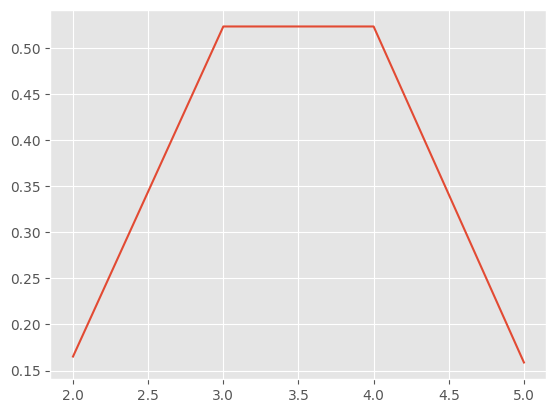

In [41]:
plt.plot(*zip(*count_silhouette))

In [47]:
km = KMeans(n_clusters=2)
%time km.fit(data_scaled)
clusters2 = km.labels_.tolist()
silhouette_k2 = silhouette_score(data_scaled[0:50000], clusters[0:50000])

CPU times: total: 62.5 ms
Wall time: 37 ms


In [48]:
data_scaled.loc[:, "cluster_number"] = clusters2

In [50]:
data_scaled["cluster_number"].value_counts()

cluster_number
0    16605
1    15956
Name: count, dtype: int64

In [51]:
data_scaled.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'cluster_number'],
      dtype='object')